In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


http://genome.cshlp.org/content/27/12/2096.full
> The raw data as well as stage-specific peaks for all three stages and the input control have been submitted to the NCBI Gene Expression Omnibus (GEO; http://www.ncbi.nlm.nih.gov/geo/) under accession number GSE89608.

genome seems to be ce10: https://github.com/brunetlab/CelegansATACseq

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89608
> GSE89608_EE_75bpMACS2Shift_mergedReps.MACS2.1_q5e-2_splitSubsPeaks_consensusPeaks_gDNA0.2PeaksRemoved.narrowPeak.gz
> GSE89608_L3_75bpMACS2Shift_mergedReps.MACS2.1_q5e-2_splitSubsPeaks_consensusPeaks_gDNA0.2PeaksRemoved.narrowPeak.gz
> GSE89608_YA_75bpMACS2Shift_mergedReps.MACS2.1_q5e-2_splitSubsPeaks_consensusPeaks_gDNA0.2PeaksRemoved.narrowPeak.gz
However, no signal tracks

In [2]:
#url_ = 'http://genome.cshlp.org/content/suppl/2017/11/15/gr.226233.117.DC1/Supplemental_Table_S3.xlsx'
#!cd ~/relmapping/wget; wget -m --no-parent {url_}
fp_ = 'wget/genome.cshlp.org/content/suppl/2017/11/15/gr.226233.117.DC1/Supplemental_Table_S3.csv'
df_ = pd.read_csv(fp_)
print('%d records' % (len(df_)))
df_ = df_.query('chr != "chrM"').reset_index(drop=True)
print(len(df_), 'non-mitochondrial records')

def name_(EE_state, L3_state, YA_state):
    return '%s %s %s' % (EE_state, L3_state, YA_state)

fp_ = 'annot/Fig2S3_overlaps/Daugherty2017/Daugherty2017_consensus_ATAC.bed'
#df_[['chr', 'start', 'stop']].to_csv(fp_, header=False, index=False, sep='\t')
#!wc -l {fp_}

write_gffbed(fp_,
    chrom = df_['chr'],
    start = df_['start'],
    end = df_['stop'],
    name = list(map(name_, df_['EE_chromHMMState'], df_['L3_chromHMMState'], df_['YA_chromHMMState'])),
    attr = df_[df_.columns[5:]],
    #itemRgb = map(lambda annot: d_annot_strand_legend[annot], df_prom_fwd['annot_summary']),
)

df_daugherty = df_[['chr', 'start', 'stop']]

30832 records
30824 non-mitochondrial records


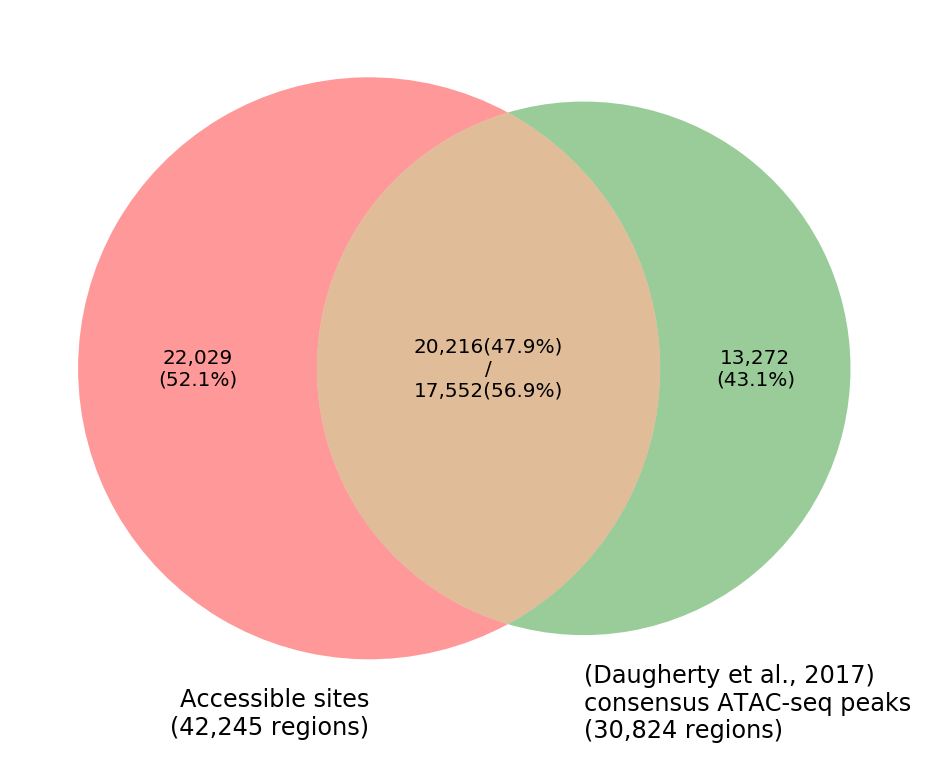

In [3]:
gv = yp.GenomicVenn2(
    BedTool.from_dataframe(regl_mode(flank_len=75)),
    BedTool.from_dataframe(df_daugherty),
    label_a='Accessible sites',
    label_b='(Daugherty et al., 2017)\nconsensus ATAC-seq peaks',
)

plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
gv.plot()